In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from datetime import datetime
import itertools
from sklearn.model_selection import TimeSeriesSplit
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import acquire
import prepare

- Using your store items data you prepped in lesson 2 exercises:

In [2]:
df = prepare.prepare_sale()

In [3]:
df.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,total_sales
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tuesday,10.92
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tuesday,30.16


1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [7]:
df2 = df.sale_amount.resample('D').sum().reset_index()

In [9]:
df2.head()

,sale_date,sale_amount
0,2013-01-01 00:00:00+00:00,13696.0
1,2013-01-02 00:00:00+00:00,13678.0
2,2013-01-03 00:00:00+00:00,14488.0
3,2013-01-04 00:00:00+00:00,15677.0
4,2013-01-05 00:00:00+00:00,16237.0


In [25]:
x = df2.sale_date
y = df2.sale_amount

In [15]:
tss = TimeSeriesSplit(n_splits=5, max_train_size=None)
for train_index, test_index in tss.split(x):
    print('TRAIN', train_index, 'TEST', test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

2. Validate your splits by plotting X_train and y_train.

Text(0.5, 1.0, 'Train and Test')

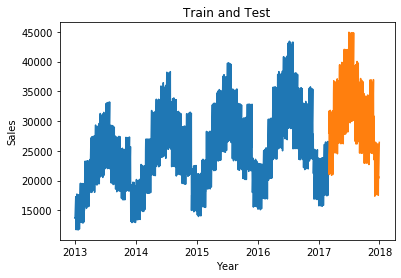

In [37]:
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Train and Test")

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [30]:
train = df[:'2016'].sale_amount.resample('D').agg('sum')
# reset index to avoid combing two different ways to do this. Pick one

Text(0.5, 1.0, 'Weekly Average')

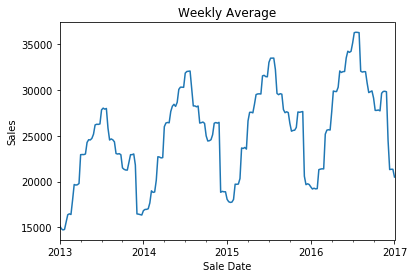

In [42]:
train.resample("W").mean().plot()

plt.xlabel("Sale Date")
plt.ylabel("Sales")
plt.title("Weekly Average")

Text(0.5, 1.0, '7-Day Moving Average')

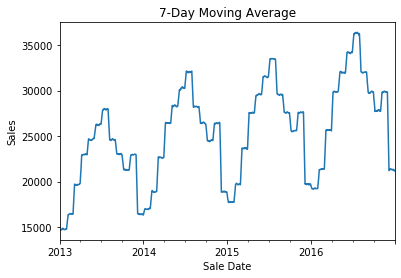

In [58]:
train.rolling(7).mean().plot()
plt.xlabel("Sale Date")
plt.ylabel("Sales")
plt.title("7-Day Moving Average")

Text(0.5, 1.0, '7-Day Moving Average vs Weekly Average')

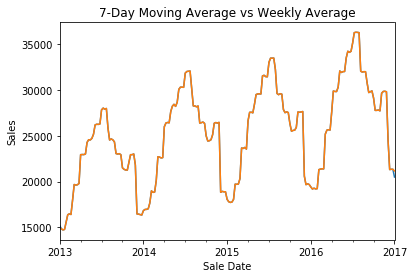

In [59]:
train.resample("W").mean().plot()
plt.xlabel("Sale Date")
plt.ylabel("Sales")

train.rolling(7).mean().plot()
plt.xlabel("Sale Date")
plt.ylabel("Sales")
plt.title("7-Day Moving Average vs Weekly Average")

#Takeaway: The two graphs are the same, forming one line.

4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

Text(0.5, 1.0, 'Daily Differences')

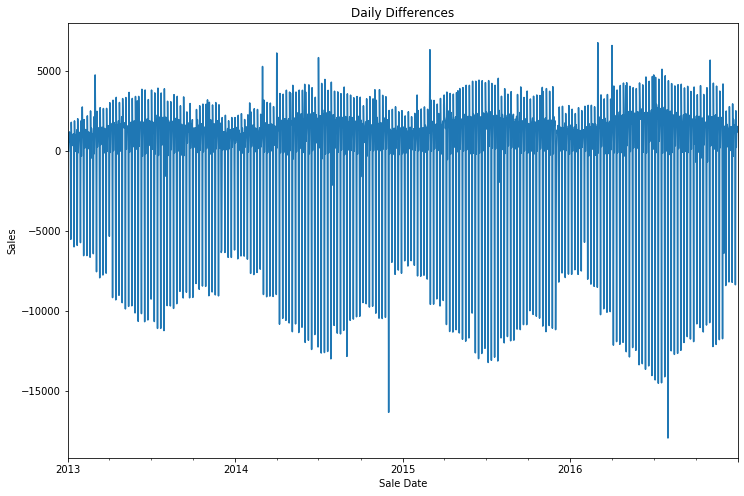

In [47]:
train.resample("D").mean().diff().plot(figsize=(12,8))
plt.xlabel("Sale Date")
plt.ylabel("Sales")
plt.title("Daily Differences")
#Takeaways: Usage doesn't vary drastically, there is a semi-smooth transition. The negative sales differ pretty greatly. There are definitive peaks and valleys in the graph.

5. Plot a time series decomposition.

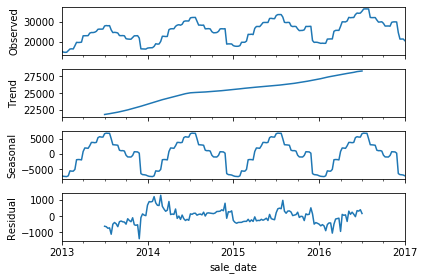

In [53]:
decomposition = sm.tsa.seasonal_decompose(train.resample("W").mean(), model='additive')
fig = decomposition.plot()

6. Create a lag plot (day over day).

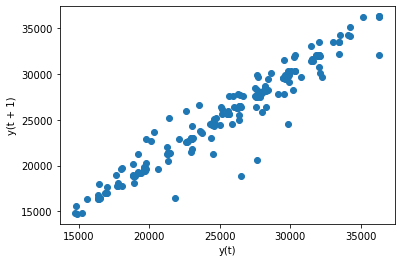

In [54]:
pd.plotting.lag_plot(train.resample("W").mean(), lag=1)

7. Run a lag correlation.

In [55]:
df_corr = pd.concat([train.shift(1), train], axis=1)
df_corr.colums = ['t-1', 't+1']
results = df_corr.corr()
print(results)

             sale_amount  sale_amount
sale_amount      1.00000      0.74914
sale_amount      0.74914      1.00000


- Using your OPS data you prepped in lesson 2 exercises:

In [4]:
ops = prepare.prepare_ops()

In [6]:
ops.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006


1. Split your data into train and test using the percent cutoff method.

In [ ]:
df2 = df.sale_amount.resample('D').sum().reset_index()

In [ ]:
x = 
y = 

In [57]:
tss = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tss.split():
    print('train', train_index, 'test', test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

2. Validate your splits by plotting X_train and y_train.

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

4. Group the electricity consumption time series by month of year, to explore annual seasonality.

5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

6. Plot a time series decomposition. Takeaways?